# Top string questions

### [Reorder Data in Log Files](https://leetcode.com/problems/reorder-data-in-log-files/)

In [ ]:
class Solution:
    def reorderLogFiles(self, logs: List[str]) -> List[str]:
        
        letter_logs = []
        digit_logs = []
        
        for i in range(len(logs)):
            if logs[i].split()[1].isdigit():
                digit_logs.append(logs[i])
            else:
                letter_logs.append(logs[i])
        
        letter_logs.sort(key = lambda x: x.split()[0])
        letter_logs.sort(key = lambda x: x.split()[1:])
        
        return letter_logs + digit_logs
        
        

### [Roman to Integer](https://leetcode.com/problems/roman-to-integer/)

In [ ]:
class Solution:
    def romanToInt(self, s: str) -> int:
        roman_int = {
            'I' : 1,
            'V': 5,
            'X': 10,
            'L': 50,
            'C':100,
            'D':500,
            'M':1000
        }
        num = 0
        for i in range(len(s)-1):
            digit = roman_int[s[i]]
            if roman_int[s[i]] < roman_int[s[i+1]]:
                num -= roman_int[s[i]] 
            else:
                num += roman_int[s[i]]
        num += roman_int[s[-1]]
        return num
                
        

### [Most common word](https://leetcode.com/problems/most-common-word/)

In [ ]:
class Solution(object):
    def mostCommonWord(self, paragraph, banned):
        banset = set(banned)
        for c in "!?',;.":
            paragraph = paragraph.replace(c, " ")
        count = collections.Counter(
            word for word in paragraph.lower().split())

        ans, best = '', 0
        for word in count:
            if count[word] > best and word not in banset:
                ans, best = word, count[word]

        return ans

### [First Unique Character in a String](https://leetcode.com/problems/first-unique-character-in-a-string/)

In [ ]:
class Solution:
    def firstUniqChar(self, s: str) -> int:
        
        count = collections.Counter(s)

        
        for id, char in enumerate(s):
            if count[char]==1:
                return id
            
        return -1

### [Valid anagram](https://leetcode.com/problems/valid-anagram/)

In [ ]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        
        ## RC ##
        ## APPROACH : alphabets array with counters ##
        
        counterS = [0] * 26
        counterT = [0] * 26
        
        for char in s:
            counterS[ord(char)-ord('a')] += 1
        
        for char in t:
            counterT[ord(char)-ord('a')] += 1
        
        for i in range(26):
            if(counterS[i] != counterT[i]):
                return False
        return True

### [Reverse words in a string](https://leetcode.com/problems/reverse-words-in-a-string/)

In [ ]:
class Solution:
    def reverseWords(self, s: str) -> str:
        # 1 liner python
        # return ''.join(s.split()[::-1])
        
        
        left, right = 0, len(s) - 1
        # remove leading spaces
        while left <= right and s[left] == ' ':
            left += 1
            
        # remove trailing spaces
        while left <= right and s[right] == ' ':
            right -= 1
        # print(left, right)
        
        # Two pointers approach
        # Dequeu for faster insertion O(1)
        queue = collections.deque()
        word = ""
        while left<= right:
            # if we reach ' ' then left word is finished
            if s[left] == ' ' and word:
                queue.appendleft(word)
                word = ""
            # character of the left word is added 
            elif s[left] != ' ':
                word += s[left]
            left += 1
        # for last word in the sentence.  
        queue.appendleft((word))
        
        return ' '.join(queue)

## Trie

### [Implement trie](https://leetcode.com/problems/implement-trie-prefix-tree/)

In [ ]:
class TrieNode:
    def __init__(self):
        # self.char = char
        self.children = {}
        self.endofword = False

class Trie:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.root = TrieNode()

    def insert(self, word: str) -> None:
        """
        Inserts a word into the trie.
        """
        head = self.root
        for char in word:
            if char not in head.children:
                node = TrieNode()
                head.children[char] = node
            
            head = head.children[char]
        head.endofword = True
            
    def search(self, word: str) -> bool:
        """
        Returns if the word is in the trie.
        """
        node = self.root
        for char in word:
            if char in node.children:
                node = node.children[char]
            else:
                return False
        return node.endofword
                
                
        

    def startsWith(self, prefix: str) -> bool:
        """
        Returns if there is any word in the trie that starts with the given prefix.
        """
        node = self.root
        for char in prefix:
            if char in node.children:
                node = node.children[char]
            else:
                return False
        return True
                


# Your Trie object will be instantiated and called as such:
# obj = Trie()
# obj.insert(word)
# param_2 = obj.search(word)
# param_3 = obj.startsWith(prefix)

### [Search suggestion systems](https://leetcode.com/problems/search-suggestions-system/)

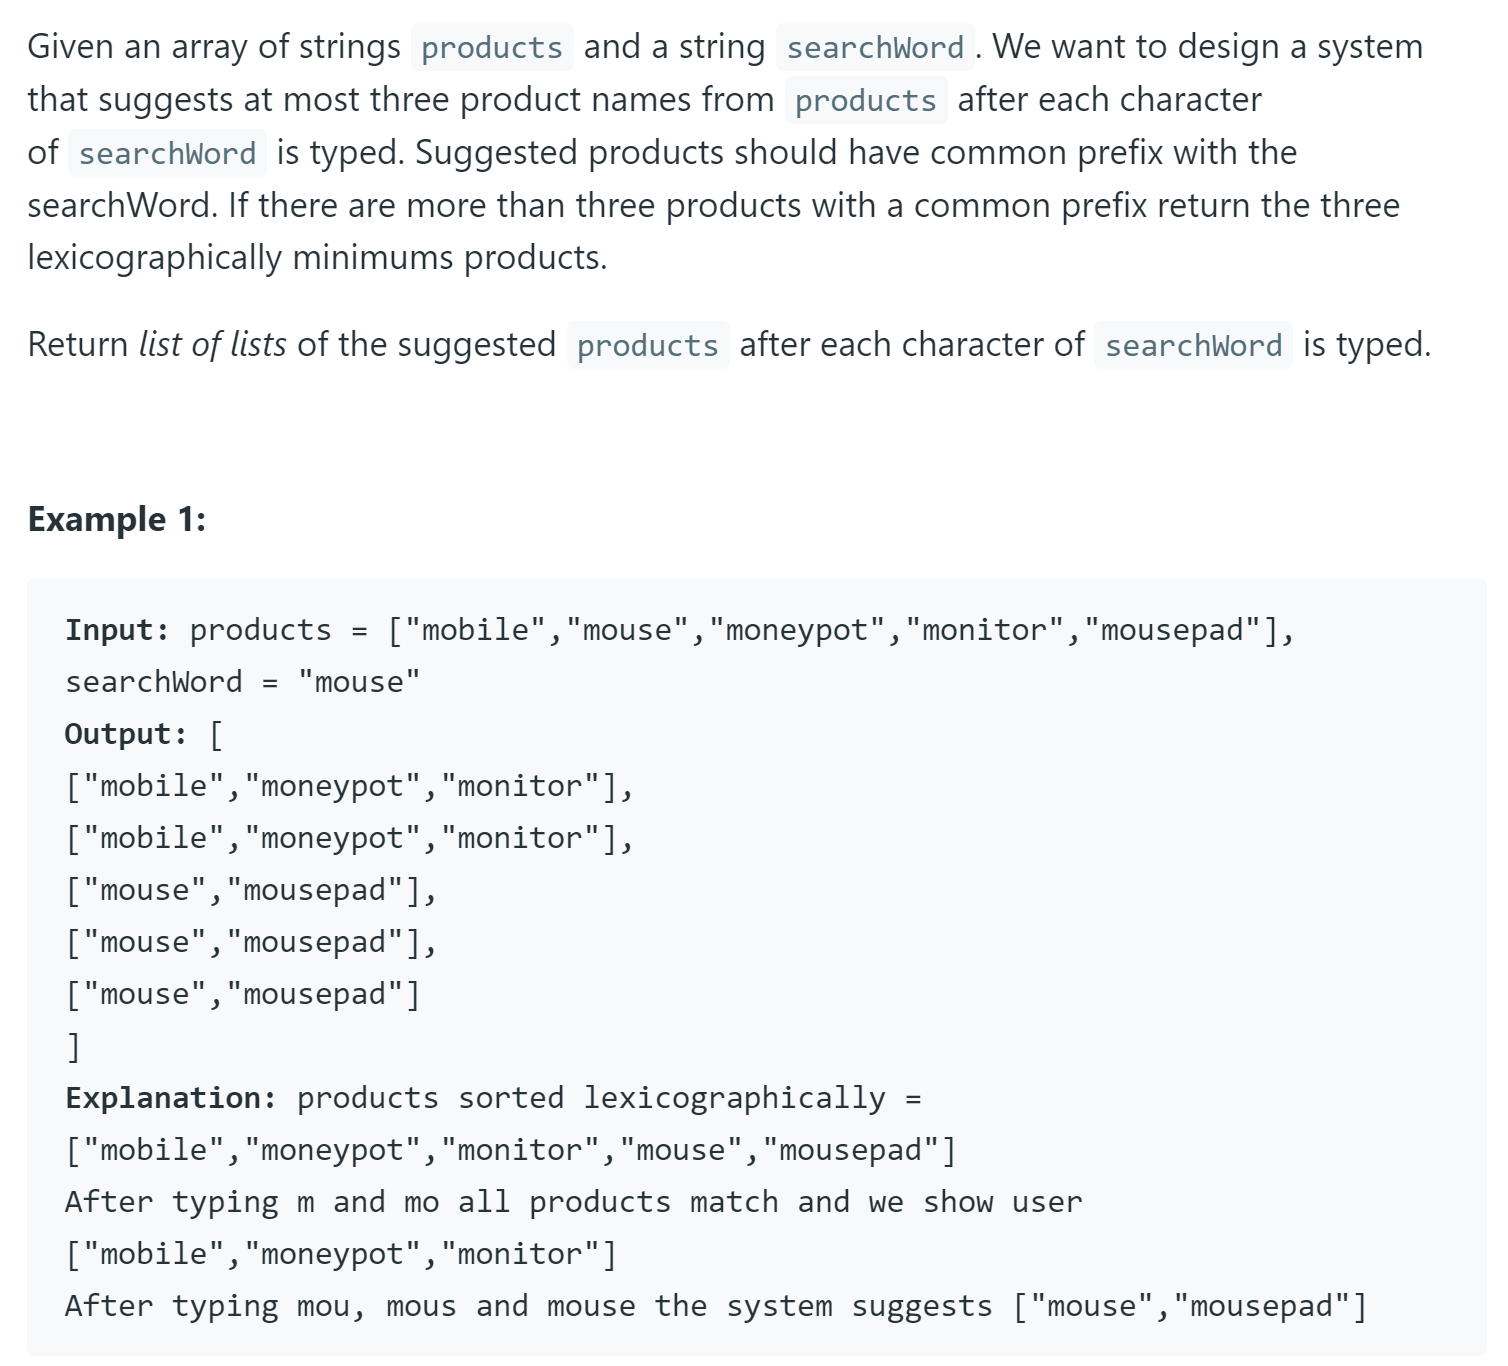

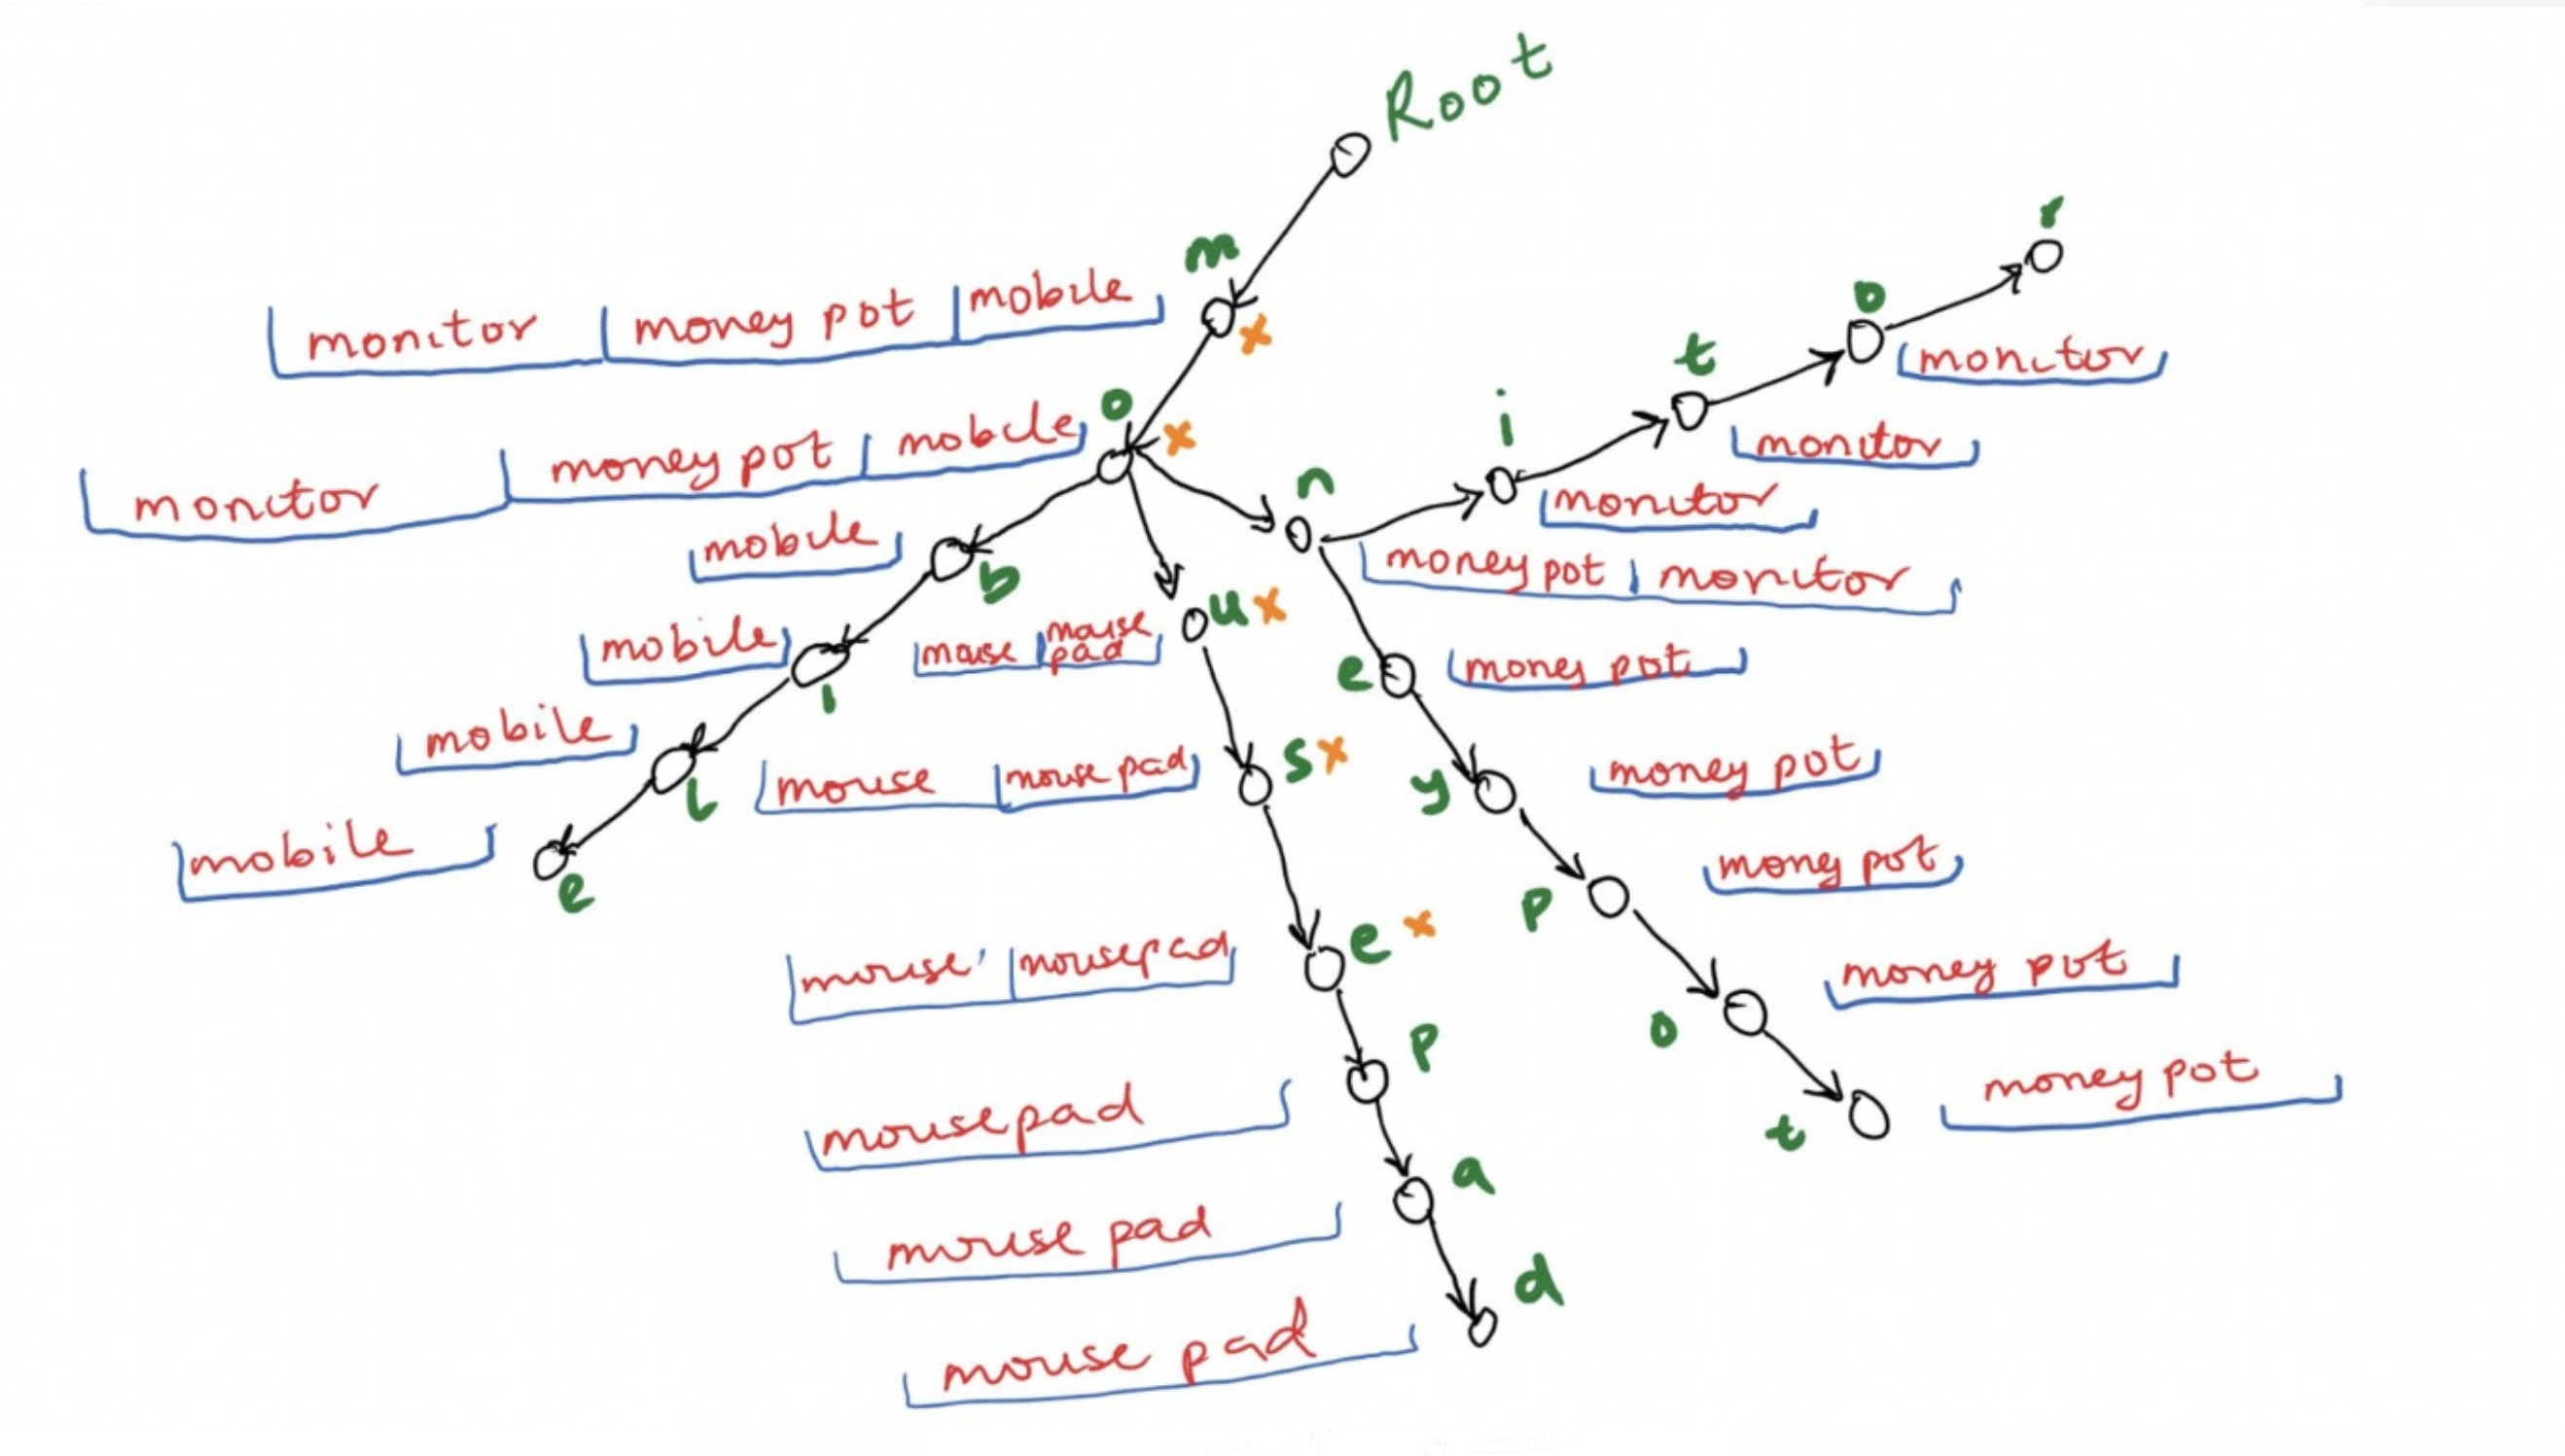

In [ ]:
class TrieNode:
    def __init__(self):
        self.children={}
        self.suggestions=[]

class Solution:
    def suggestedProducts(self, products: List[str], searchWord: str) -> List[List[str]]:
        root=TrieNode()
        products.sort()
        for prod in products:
            node=root
            for letter in prod:
                if(letter not in node.children):
                    node.children[letter]=TrieNode()
                # traverse 
                node=node.children[letter]
                # add products starting with char
                if(len(node.suggestions)<3):
                    node.suggestions.append(prod)
        result=[]
        for letter in searchWord:
            if(root):
                root=root.children.get(letter,None)
            result.append(root.suggestions if root else [])
                
        return result


### Design autocomplete system

## Hashmap

### [Verify alien dictionary](https://leetcode.com/problems/verifying-an-alien-dictionary/)

In [ ]:
class Solution:
    def isAlienSorted(self, words: List[str], order: str) -> bool:
        alien_dict = {}
        
        for pos, word in enumerate(order):
            alien_dict[word] = pos
            
        # print(alien_dict)
        for i in range(len(words)-1):
            w1 = words[i]
            w2 = words[i+1]
            for j in range(min(len(w1), len(w2))):
                if w1[j] != w2[j]:
                    if alien_dict[w1[j]] > alien_dict[w2[j]]:
                        return False
                    break
            else:
                if len(w1) > len(w2):
                    return False
                
            
        return True

### [Group Anagrams](https://leetcode.com/problems/group-anagrams/)

In [ ]:
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        
        
        #   1. depending on the alphabet count we figure anagram and store them in a hashmap.
        
        lookup = collections.defaultdict(list)
        for word in strs:
            alphabetCount = [0] * 26
            for alphabet in word:
                alphabetCount[ord(alphabet.lower()) - 97] += 1
            
            pattern = tuple(alphabetCount)                          # hashmap can have tuples on the left side.
            lookup[pattern].append(word)
            
        return lookup.values()                

### [Partition labels](https://leetcode.com/problems/partition-labels/)

In [ ]:
class Solution:
    def partitionLabels(self, S: str) -> List[int]:
        char_pos = {}
        
        # Store the last pos of each character
        for i, char in enumerate(S):
            char_pos[char] = i
            
        
        res = []
        j = start = 0
        
        # the length of each partition would be the string's length in which the char appears
        # a appears at 0 pos and 8 pos. 
        # so first partition length will be 8-0 + 1
        for i, c in enumerate(S):
            j = max(j, char_pos[c])
            if i == j:
               res.append(i - start + 1)
                
               start = i + 1
        
        return res
        